In [270]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [271]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path

proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

import warnings
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

warnings.filterwarnings("ignore")

from dqn.opinion_dynamics.utils.experiment import process_experiment


In [272]:
# experiment_sub_dir = "2025May02-101004_configs" # excellent run
# experiment_sub_dir = "2025Jul09-171538_configs" # good latest run
# experiment_sub_dir = "2025Sep15-090310_configs" paper run 1 finite h

# experiment_sub_dir = "2025Oct08-223231_configs" 
experiment_sub_dir = "2025Oct13-143523_configs" 


exp_path = os.path.join(os.path.abspath("."), "results", experiment_sub_dir)
df = process_experiment(
    exp_path
)
# df.columns


In [273]:
# df

In [274]:
# df[df['epoch_type'] == 'validation']
# df[df['epoch_type'] == 'training']

In [275]:
# Define hyperparameter columns
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

# Group by hyperparameter values and compute mean episode_rewards_mean
averaged_results = df.groupby(hyperparam_columns, as_index=False).agg({
    'episode_rewards_mean': 'mean',  # Averaging the performance metric
    'sub_experiment_path': 'first'   # Keep a reference to an experiment path
})

# Find the best hyperparameter set based on the highest mean reward
best_row = averaged_results.loc[averaged_results['episode_rewards_mean'].idxmax()]

# Print the best experiment path and hyperparameters
print(f"Best hyperparameters:\n{best_row[hyperparam_columns]}")
print(f"Best mean reward: {best_row['episode_rewards_mean']}")

Best hyperparameters:
sub_exp_cfg_estimator.model                                OpinionNet
sub_exp_cfg_agent_params.args_.replay_start_size                 5000
sub_exp_cfg_agent_params.args_.action_w_noise_amplitude           0.3
sub_exp_cfg_agent_params.args_.target_soft_tau                 0.0008
sub_exp_cfg_experiment                                          fixed
Name: 7, dtype: object
Best mean reward: -8.99847054003924


In [276]:
averaged_results

,sub_exp_cfg_estimator.model,sub_exp_cfg_agent_params.args_.replay_start_size,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_exp_cfg_agent_params.args_.target_soft_tau,sub_exp_cfg_experiment,episode_rewards_mean,sub_experiment_path
0,OpinionNet,10000,0.1,0.0005,fixed,-13.561582,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
1,OpinionNet,10000,0.1,0.0008,fixed,-10.618269,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
2,OpinionNet,10000,0.3,0.0005,fixed,-9.227953,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
3,OpinionNet,10000,0.3,0.0008,fixed,-11.141436,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
4,OpinionNet,5000,0.1,0.0005,fixed,-10.967337,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
5,OpinionNet,5000,0.1,0.0008,fixed,-13.033051,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
6,OpinionNet,5000,0.3,0.0005,fixed,-9.457161,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
7,OpinionNet,5000,0.3,0.0008,fixed,-8.998471,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
8,OpinionNetCommonAB,10000,0.1,0.0005,fixed,-13.561582,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
9,OpinionNetCommonAB,10000,0.1,0.0008,fixed,-10.618269,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...


In [277]:
# selected_metric = 'episode_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

# # Filter for validation episodes
# validation_df = df[df['epoch_type'] == 'validation']

# # Get the unique sorted frame_stamp values
# unique_frames = np.sort(validation_df['frame_stamp'].unique())
# N = 1
# # Get all frame_stamp values after the first N unique ones
# filtered_frames = unique_frames[N:]

# # Filter the DataFrame to only include rows with these frame_stamp values
# filtered_df = validation_df[validation_df['frame_stamp'].isin(filtered_frames)]

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=filtered_df, x='frame_stamp', y=selected_metric, hue=hue_col)
# plt.ylabel(selected_metric)
# plt.xlabel('Frame Stamp')
# plt.show()

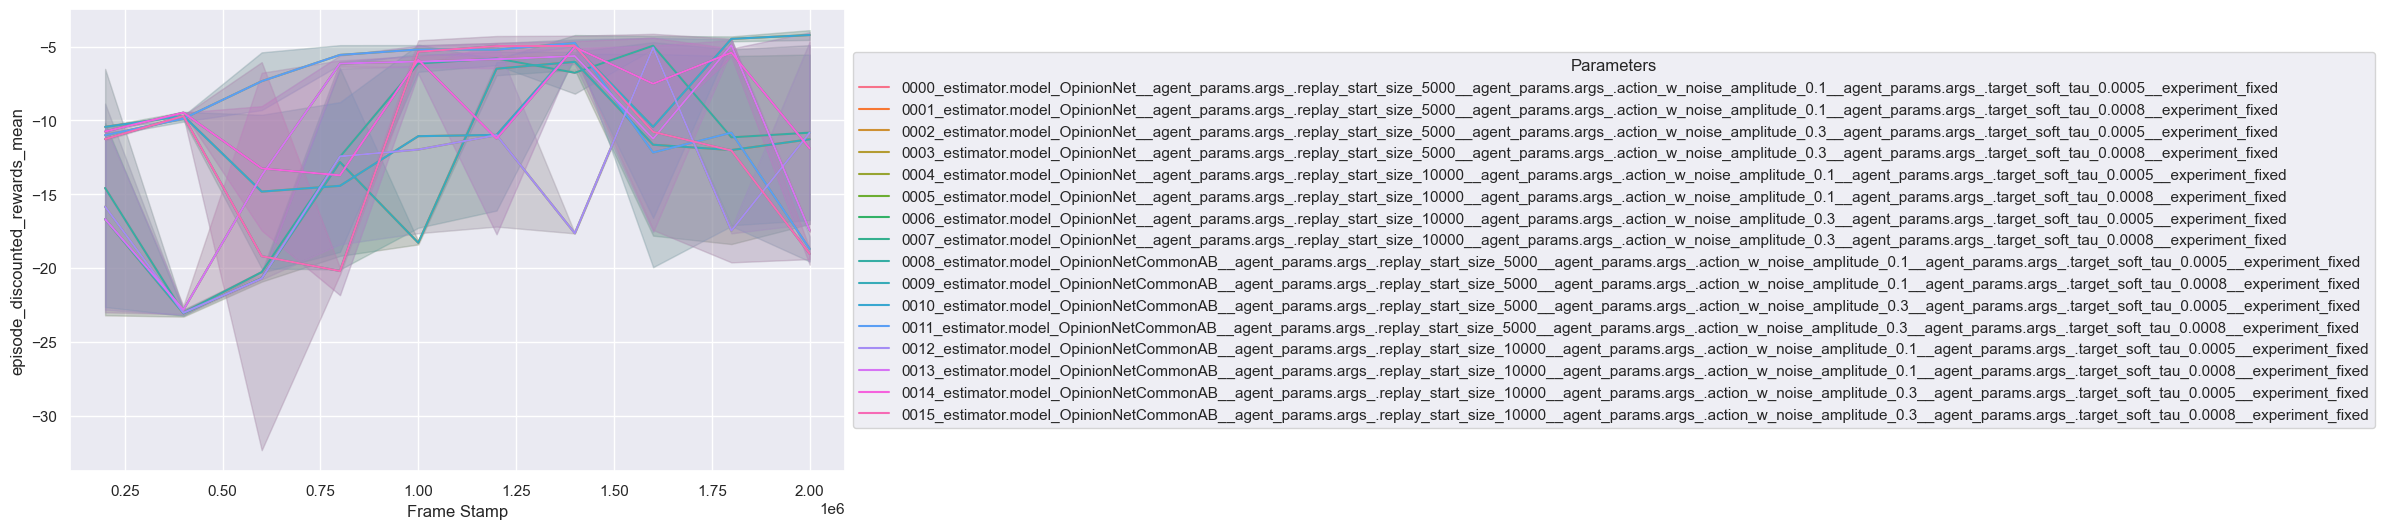

In [278]:

selected_metric = 'episode_discounted_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"
hue_col = "experiment_name"

validation_df = df[df['epoch_type'] == 'validation']
# validation_df = df[df['epoch_type'] == 'training']


# Create a new figure for each environment
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
sns.lineplot(data=validation_df, 
             x='frame_stamp', 
             y=selected_metric, 
             hue=hue_col,
            #  units='seed', # Comment this to see mean + cf
            #  estimator=None, # Comment this to see mean + cf
             )

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Parameters')
plt.show()

In [279]:
df.columns

Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_estimator.model',
       'sub_exp_cfg_agent_params.args_.replay_start_size',
       'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude',
       'sub_exp_

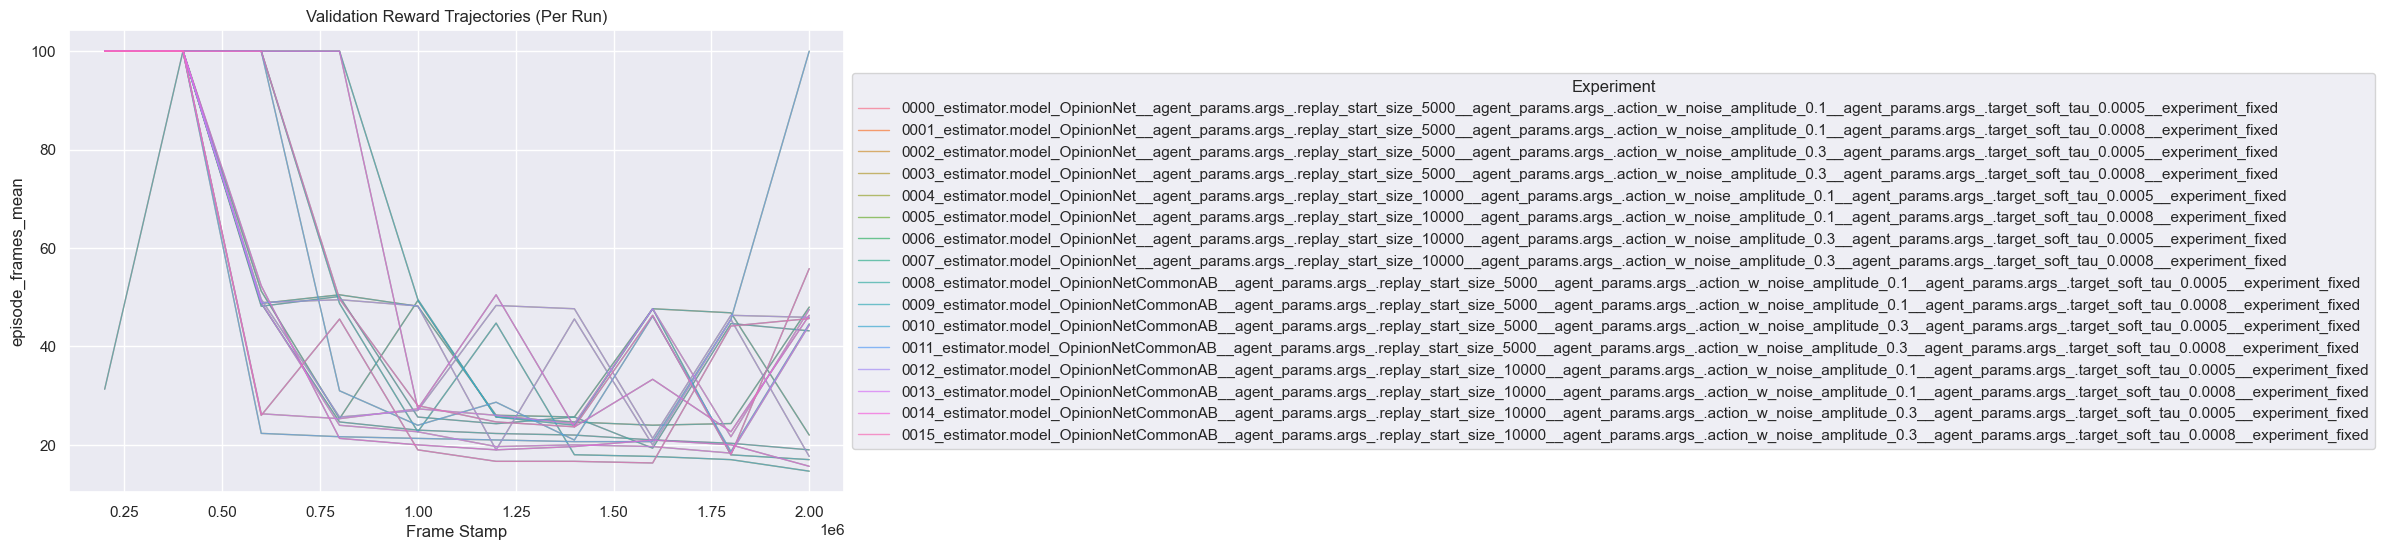

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_metric = 'episode_frames_mean'
hue_col = "experiment_name"  # or another distinguishing column like "sub_experiment_path"

validation_df = df[df['epoch_type'] == 'validation']

# Plot individual lines for each run
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=validation_df,
    x='frame_stamp',
    y=selected_metric,
    hue=hue_col,
    estimator=None,  # ← disables aggregation
    units='sub_experiment_path',  # ← groups lines by unique run
    lw=1,  # line width
    alpha=0.7  # transparency
)

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.title('Validation Reward Trajectories (Per Run)')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Experiment')
plt.tight_layout()
plt.show()


In [281]:
### Select data

experiment_columns = [
    'epoch_type', 'frame_stamp',
    'episode_rewards_mean', 'episode_frames_mean', 
    'episode_discounted_rewards_mean',
    'policy_trained_times', 'target_trained_times', 'epoch_time', 
       'seed', 'experiment_name', "sub_experiment_path"
]
hyperparam_columns = [
   col for col in df.columns if "sub_exp_cfg" in col
]

cols_of_interest = experiment_columns + hyperparam_columns

sub_df = df[cols_of_interest]
sub_df = sub_df[sub_df['epoch_type'] == 'validation']
sub_df = sub_df[sub_df['frame_stamp'] == sub_df['frame_stamp'].max()]

sub_df 


,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_estimator.model,sub_exp_cfg_agent_params.args_.replay_start_size,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_exp_cfg_agent_params.args_.target_soft_tau,sub_exp_cfg_experiment
19,validation,2000000,-25.119572,43.181034,-16.757641,NaN,NaN,0 days 00:00:15.658051,0,0000_estimator.model_OpinionNet__agent_params....,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5000,0.1,0.0005,fixed
39,validation,2000000,-5.146177,19.000000,-4.908022,NaN,NaN,0 days 00:00:15.686691,1,0000_estimator.model_OpinionNet__agent_params....,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5000,0.1,0.0005,fixed
59,validation,2000000,-5.858734,22.000000,-5.542460,NaN,NaN,0 days 00:00:15.282866,0,0001_estimator.model_OpinionNet__agent_params....,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5000,0.1,0.0008,fixed
79,validation,2000000,-25.292307,48.000000,-17.020806,NaN,NaN,0 days 00:00:15.625786,1,0001_estimator.model_OpinionNet__agent_params....,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5000,0.1,0.0008,fixed
99,validation,2000000,-4.024341,14.666667,-3.891948,NaN,NaN,0 days 00:00:16.129500,0,0002_estimator.model_OpinionNet__agent_params....,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5000,0.3,0.0005,fixed
119,validation,2000000,-4.742672,17.010169,-4.548760,NaN,NaN,0 days 00:00:16.241703,1,0002_estimator.model_OpinionNet__agent_params....,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5000,0.3,0.0005,fixed
139,validation,2000000,-29.776932,100.000000,-19.557139,NaN,NaN,0 days 00:00:15.515835,0,0003_estimator.model_OpinionNet__agent_params....,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5000,0.3,0.0008,fixed
159,validation,2000000,-26.889699,44.584071,-17.860074,NaN,NaN,0 days 00:00:15.470900,1,0003_estimator.model_OpinionNet__agent_params....,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5000,0.3,0.0008,fixed
179,validation,2000000,-4.872757,17.658451,-4.663689,NaN,NaN,0 days 00:00:15.540004,0,0004_estimator.model_OpinionNet__agent_params....,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,10000,0.1,0.0005,fixed
199,validation,2000000,-25.420071,45.918182,-17.011670,NaN,NaN,0 days 00:00:15.333437,1,0004_estimator.model_OpinionNet__agent_params....,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,10000,0.1,0.0005,fixed


In [282]:
agg_cols = [col for col in sub_df.columns if "sub_exp_cfg" in col]
aggregated_df = (
    sub_df.groupby(agg_cols)
    .agg(episode_discounted_rewards_mean=("episode_discounted_rewards_mean", "mean"))
    .reset_index()
)
aggregated_df

,sub_exp_cfg_estimator.model,sub_exp_cfg_agent_params.args_.replay_start_size,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_exp_cfg_agent_params.args_.target_soft_tau,sub_exp_cfg_experiment,episode_discounted_rewards_mean
0,OpinionNet,10000,0.1,0.0005,fixed,-10.837680
1,OpinionNet,10000,0.1,0.0008,fixed,-17.466035
2,OpinionNet,10000,0.3,0.0005,fixed,-11.907149
3,OpinionNet,10000,0.3,0.0008,fixed,-19.041194
4,OpinionNet,5000,0.1,0.0005,fixed,-10.832832
5,OpinionNet,5000,0.1,0.0008,fixed,-11.281633
6,OpinionNet,5000,0.3,0.0005,fixed,-4.220354
7,OpinionNet,5000,0.3,0.0008,fixed,-18.708606
8,OpinionNetCommonAB,10000,0.1,0.0005,fixed,-10.837680
9,OpinionNetCommonAB,10000,0.1,0.0008,fixed,-17.466035


In [283]:
sub_df.columns

Index(['epoch_type', 'frame_stamp', 'episode_rewards_mean',
       'episode_frames_mean', 'episode_discounted_rewards_mean',
       'policy_trained_times', 'target_trained_times', 'epoch_time', 'seed',
       'experiment_name', 'sub_experiment_path', 'sub_exp_cfg_estimator.model',
       'sub_exp_cfg_agent_params.args_.replay_start_size',
       'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude',
       'sub_exp_cfg_agent_params.args_.target_soft_tau',
       'sub_exp_cfg_experiment'],
      dtype='object')

In [284]:
print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['sub_experiment_path'].values[0])


d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results\2025Oct13-143523_configs\0002_estimator.model_OpinionNet__agent_params.args_.replay_start_size_5000__agent_params.args_.action_w_noise_amplitude_0.3__agent_params.args_.target_soft_tau_0.0005__experiment_fixed\0


In [285]:
sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]


,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_estimator.model,sub_exp_cfg_agent_params.args_.replay_start_size,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_exp_cfg_agent_params.args_.target_soft_tau,sub_exp_cfg_experiment
99,validation,2000000,-4.024341,14.666667,-3.891948,NaN,NaN,0 days 00:00:16.129500,0,0002_estimator.model_OpinionNet__agent_params....,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5000,0.3,0.0005,fixed
419,validation,2000000,-4.024341,14.666667,-3.891948,NaN,NaN,0 days 00:00:19.078706,0,0010_estimator.model_OpinionNetCommonAB__agent...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNetCommonAB,5000,0.3,0.0005,fixed


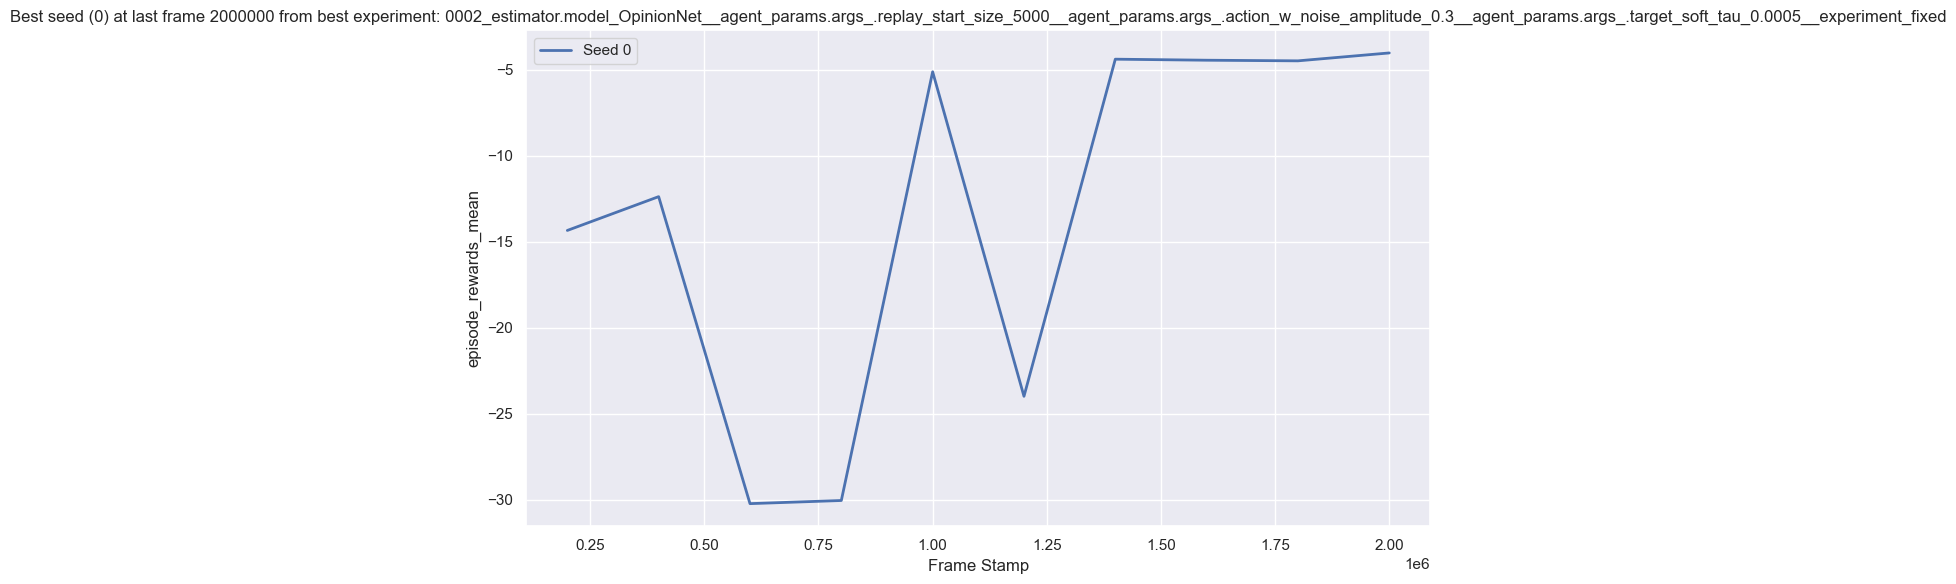

In [292]:
selected_metric = 'episode_rewards_mean'
hue_col = 'experiment_name'

val_df = df[df['epoch_type'] == 'validation'].copy()

# 1) Last global frame
last_frame = val_df['frame_stamp'].max()
last_df = val_df[val_df['frame_stamp'] == last_frame]

# 2) Best experiment by mean at LAST frame (averaged across seeds)
best_experiment = last_df.groupby(hue_col)[selected_metric].mean().idxmax()

# 3) Within that experiment, the best seed at LAST frame
best_seed = (last_df[last_df[hue_col] == best_experiment]
             .groupby('seed')[selected_metric].mean()
             .idxmax())

# 4) Plot the whole curve for that experiment+seed (not just the final point)
best_seed_df = val_df[(val_df[hue_col] == best_experiment) & (val_df['seed'] == best_seed)]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=best_seed_df,
    x='frame_stamp',
    y=selected_metric,
    lw=2,
    label=f"Seed {best_seed}"
)
plt.title(f"Best seed ({best_seed}) at last frame {last_frame} from best experiment: {best_experiment}")
plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.legend()
plt.tight_layout()
plt.show()

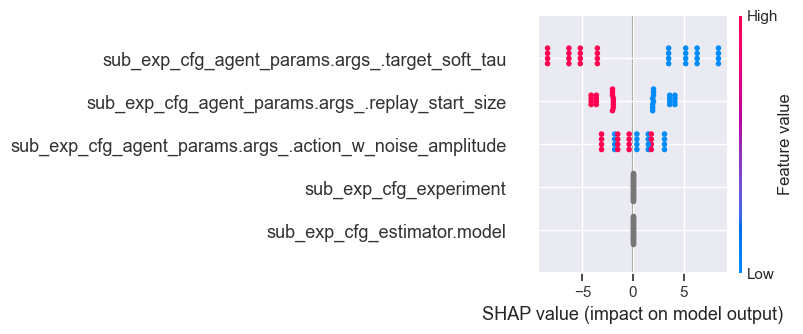

In [287]:
import shap
import xgboost
import pandas as pd


# Define the target metric and hyperparameter columns
target_metric = "episode_rewards_mean"  # Replace with actual metric column name
# Replace with actual hyperparameter column names

# Prepare data
X = sub_df[hyperparam_columns].apply(pd.to_numeric, errors='coerce')
y = sub_df[target_metric].fillna(3 * sub_df[target_metric].min())

# Train an XGBoost model to analyze feature importance
model = xgboost.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X)

In [288]:
# Minimal cell to PRINT compact SHAP data you can paste back here

import numpy as np
import pandas as pd

# Use the same X and shap_values from your previous cell
X_num = X.apply(pd.to_numeric, errors="coerce").fillna(X.median(numeric_only=True))

# Global importance = mean(|SHAP|) per feature
sv = shap_values
vals = sv.values if hasattr(sv, "values") else sv  # support both SHAP objects & raw arrays
mean_abs = np.mean(np.abs(vals), axis=0)

# Direction: correlation between SHAP value and raw feature (helps read summary plot colors)
corrs = []
for i, col in enumerate(X_num.columns):
    xcol = X_num.iloc[:, i].to_numpy()
    sval = vals[:, i]
    # robust correlation: handle constant columns or NaNs
    if np.allclose(xcol, xcol[0]) or np.all(np.isnan(xcol)):
        corrs.append(np.nan)
    else:
        c = np.corrcoef(xcol, sval)[0, 1]
        corrs.append(c)

global_df = pd.DataFrame({
    "feature": X_num.columns,
    "mean_abs_shap": mean_abs,
    "corr_sign": np.sign(corrs),   # +1 ≈ higher feature -> higher prediction; -1 opposite
    "corr_value": corrs
}).sort_values("mean_abs_shap", ascending=False)

# Keep per-row SHAP small: only top-10 features
topk = 10 if len(global_df) > 10 else len(global_df)
top_feats = global_df["feature"].head(topk).tolist()
top_idx = [X_num.columns.get_loc(f) for f in top_feats]
perrow_df = pd.DataFrame(vals[:, top_idx], columns=top_feats, index=sub_df.index)

# Also handy context
meta_df = pd.DataFrame({
    "prediction": model.predict(X_num),
    target_metric: sub_df[target_metric].values
}, index=sub_df.index)

# ---- PRINT CSV blocks you can paste here ----
print("# --- shap_global.csv ---")
print(global_df.to_csv(index=False))

print("# --- shap_values_top10.csv ---")
print(perrow_df.to_csv())

print("# --- shap_meta.csv ---")
print(meta_df.to_csv())


# --- shap_global.csv ---
feature,mean_abs_shap,corr_sign,corr_value
sub_exp_cfg_agent_params.args_.target_soft_tau,5.883625,-1.0,-0.956686794897721
sub_exp_cfg_agent_params.args_.replay_start_size,2.9370303,-1.0,-0.9498597566918426
sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,1.7051033,-1.0,-0.40677644579935546
sub_exp_cfg_estimator.model,0.0,,
sub_exp_cfg_experiment,0.0,,

# --- shap_values_top10.csv ---
,sub_exp_cfg_agent_params.args_.target_soft_tau,sub_exp_cfg_agent_params.args_.replay_start_size,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_exp_cfg_estimator.model,sub_exp_cfg_experiment
19,3.5272675,1.9466834,-1.8131579,0.0,0.0
39,3.5272675,1.9466834,-1.8131579,0.0,0.0
59,-3.5272667,3.6310751,3.1139028,0.0,0.0
79,-3.5272667,3.6310751,3.1139028,0.0,0.0
99,8.454328,4.1417212,1.8131586,0.0,0.0
119,8.454328,4.1417212,1.8131586,0.0,0.0
139,-8.454327,2.0286424,-3.1139023,0.0,0.0
159,-8.454327,2.0286424,-3.1139023,0.0,0.0
179,5.211658,-1.9466832,0.3818803,0.0,0.

In [289]:
hyperparam_columns

['sub_exp_cfg_estimator.model',
 'sub_exp_cfg_agent_params.args_.replay_start_size',
 'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude',
 'sub_exp_cfg_agent_params.args_.target_soft_tau',
 'sub_exp_cfg_experiment']

In [290]:
import plotly.express as px

# --- config ---
target_col = "episode_rewards_mean"          # your target metric
color_col  = "experiment_name"               # optional color grouping
readable_names = {
    # optional friendly names; falls back to raw column name if missing
    # "hp_raw_name": "Pretty Name",
}

# --- build plots ---
varying_hps = [hp for hp in hyperparam_columns if sub_df[hp].nunique(dropna=False) > 1]

if not varying_hps:
    print("No hyperparameters with more than one unique value — nothing to plot.")
else:
    for hp in varying_hps:
        # Rename only the current x column (leave others as-is for hover)
        x_name = readable_names.get(hp, hp)
        plot_df = sub_df.rename(columns={hp: x_name})

        fig = px.scatter(
            plot_df,
            x=x_name,
            y=target_col,
            color=color_col if color_col in plot_df.columns else None,
            hover_data=hyperparam_columns,  # handy to inspect full config per point
            title=f"{target_col} vs {x_name} (varying: {sub_df[hp].nunique(dropna=False)})",
            height=500
        )
        fig.update_traces(mode="markers", marker=dict(size=8, opacity=0.8))
        fig.update_layout(showlegend=False)
        fig.show()